# TP1 ADM : Analyse statistique de base
### GHAZEL Hassen HALVICK Thomas
### Polytech Lyon | 4A Info

In [22]:
#Importation des librairies
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

folder = "data/"

# **Exercice 1**

Les données dans le fichier capital.xls sont extraites du magazine Capital qui a donné pour 100 villes 
françaises les valeurs du taux de la taxe d’habitation.

## Question 1
Importer le fichier capital.xls

In [23]:
#Importation de capiptal.xls
df = pd.read_excel(folder+'Capital.xls') 

print(df)

               Ville    TTH         Région
0    Aix en provence  18.94        Sud-Est
1            Ajaccio  22.06        Sud-Est
2             Amiens  17.97           Nord
3             Angers  18.86          Ouest
4             Annecy  14.97        Sud-Est
..               ...    ...            ...
95        Vénissieux  18.70        Sud-Est
96        Versailles   8.95  Ile-de-France
97  Villeneuve-d'Asq  29.96           Nord
98      Villeurbanne  19.85        Sud-Est
99   Vitry-sur-Seine  11.50  Ile-de-France

[100 rows x 3 columns]


## Question 2
Donner une représentation graphique en histogramme du pourcentage de villes par région

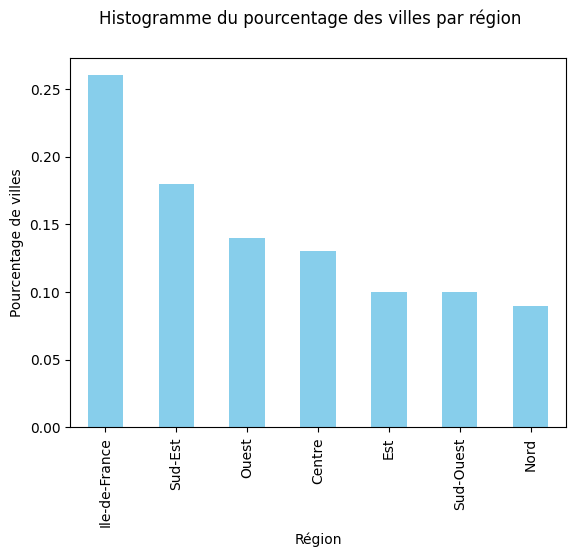

In [25]:
# Histogramme du pourcentage de villes par région
# Créer l'histogramme
hist = df["Région"].value_counts(normalize=True).plot(kind='bar', color='skyblue')

# Titre et labels
plt.suptitle("Histogramme du pourcentage des villes par région")
plt.xlabel("Région")
plt.ylabel("Pourcentage de villes")

# Afficher l'histogramme
plt.show()

## Question 3
Représenter graphiquement et de différentes manières la répartition de chaque région pour cet
ensemble de données. 


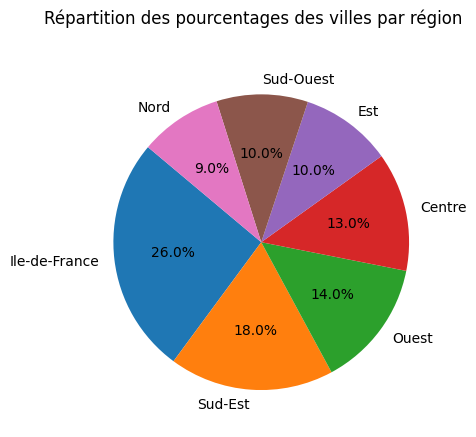

In [26]:
# Pie chart des pourcentages de villes par région
pie = df["Région"].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)

# Titre
plt.suptitle("Répartition des pourcentages des villes par région")

# Supprimer les labels x et y
pie.set_xlabel("")
pie.set_ylabel("")

# Afficher le diagramme circulaire
plt.show()

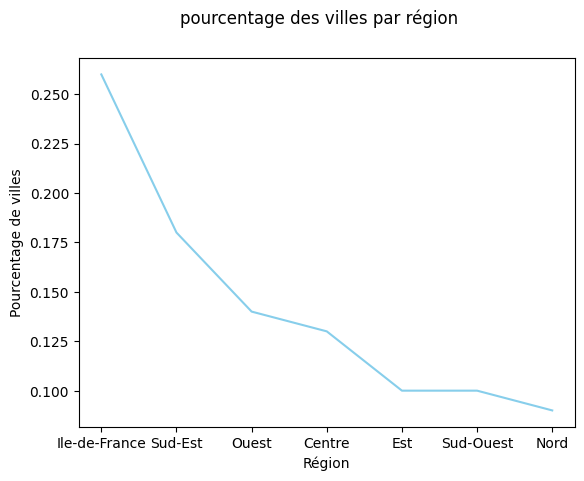

In [28]:
# Histogramme du pourcentage de villes par région
# Créer l'histogramme
hist = df["Région"].value_counts(normalize=True).plot( color='skyblue')

# Titre et labels
plt.suptitle("pourcentage des villes par région")
plt.xlabel("Région")
plt.ylabel("Pourcentage de villes")

# Afficher l'histogramme
plt.show()

## Question 4 
Quelle est la région la plus représentée dans cette étude ? 

In [29]:
max_value = df["Région"].value_counts().max()
max_region = df["Région"].value_counts().idxmax()
print("La région avec le plus grand nombre de villes est", max_region, "avec", max_value, "villes")

La région avec le plus grand nombre de villes est Ile-de-France avec 26 villes


## Question 5
Calculer les différentes statistiques sur le taux de la taxe d’habitation.


In [30]:
print(df.TTH.describe())

count    100.000000
mean      17.770700
std        5.529599
min        3.680000
25%       15.062500
50%       17.625000
75%       20.522500
max       36.170000
Name: TTH, dtype: float64


Regrouper ensuite ces statistiques par région.

In [31]:
print(df.groupby("Région").TTH.describe())

               count       mean       std    min      25%     50%      75%  \
Région                                                                       
Centre          13.0  18.115385  1.906881  15.77  17.0700  17.370  19.1900   
Est             10.0  17.662000  2.095200  14.98  16.3875  16.975  18.1850   
Ile-de-France   26.0  11.764615  3.879327   3.68   9.2425  11.285  14.7375   
Nord             9.0  25.951111  7.099798  15.37  20.4600  27.970  29.9600   
Ouest           14.0  18.896429  3.098314  14.00  16.6875  18.265  21.0900   
Sud-Est         18.0  19.769444  2.938534  14.30  18.7675  19.575  21.4225   
Sud-Ouest       10.0  20.511000  4.549406  12.72  19.2700  21.010  21.9325   

                 max  
Région                
Centre         21.55  
Est            22.04  
Ile-de-France  19.32  
Nord           36.17  
Ouest          25.99  
Sud-Est        25.98  
Sud-Ouest      30.23  


## Question 6
Quelle est la région la plus intéressante pour le taux de la taxe d’habitation ? 

In [32]:
df.groupby("Région").TTH.mean().idxmin()

'Ile-de-France'

## Question 7

Quelle est la région la plus représentative de la moyenne nationale ?

In [33]:
# Calculer la moyenne nationale des temps de travail hebdomadaire (TTH)
moyenne_nationale = df["TTH"].mean()

# Calculer la moyenne des TTH pour chaque région
moyenne_par_region = df.groupby("Région")["TTH"].mean()

# Comparer les moyennes régionales avec la moyenne nationale
region_representative = moyenne_par_region.sub(moyenne_nationale).abs().idxmin()

print("La région la plus représentative de la moyenne nationale est :", region_representative)

La région la plus représentative de la moyenne nationale est : Est


## Question 8
Donner en fonction du taux de la taxe d’habitation une typologie des villes françaises en 3 groupes.


In [34]:
# Définir les seuils pour chaque groupe en fonction des quantiles
seuil_bas = df["TTH"].quantile(1/3)
seuil_haut = df["TTH"].quantile(2/3)

# Définir une fonction pour attribuer un groupe en fonction du taux de taxe d'habitation
def typologie_taxe(taux):
    if taux < seuil_bas:
        return "Faible"
    elif taux < seuil_haut:
        return "Moyen"
    else:
        return "Élevé"

# Appliquer la fonction pour créer une nouvelle colonne "Typologie"
df["Typologie"] = df["TTH"].apply(typologie_taxe)

# Afficher la typologie des villes françaises
print("Typologie des villes françaises en fonction du taux de taxe d’habitation :")
print(df["Typologie"].value_counts())


Typologie des villes françaises en fonction du taux de taxe d’habitation :
Typologie
Élevé     34
Moyen     33
Faible    33
Name: count, dtype: int64


## Question 9
En utilisant une fonction Python, donner les villes qui ont un taux de taxe d’habitation situé 30% au dessus ou en dessous de la moyenne. 


In [35]:
df[~df["TTH"].between(df["TTH"].mean()*0.7, df["TTH"].mean()*1.3)]

,Ville,TTH,Région,Typologie
6,Antony,11.07,Ile-de-France,Faible
8,Arles,24.49,Sud-Est,Élevé
9,Asnières-sur-Seine,10.13,Ile-de-France,Faible
19,Boulogne-Billancourt,9.46,Ile-de-France,Faible
21,Brest,25.99,Ouest,Élevé
...,...,...,...,...
87,Sartrouville,12.38,Ile-de-France,Faible
91,Tourcoing,33.61,Nord,Élevé
96,Versailles,8.95,Ile-de-France,Faible
97,Villeneuve-d'Asq,29.96,Nord,Élevé


## Question 10
Idem pour les villes qui ont un taux de taxe d’habitation situé 20% au dessus ou en dessous de la moyenne.

In [36]:
df[~df["TTH"].between(df["TTH"].mean()*0.8, df["TTH"].mean()*1.2)]

,Ville,TTH,Région,Typologie
1,Ajaccio,22.06,Sud-Est,Élevé
6,Antony,11.07,Ile-de-France,Faible
8,Arles,24.49,Sud-Est,Élevé
9,Asnières-sur-Seine,10.13,Ile-de-France,Faible
10,Aubervilliers,12.45,Ile-de-France,Faible
...,...,...,...,...
88,Strasbourg,22.04,Est,Élevé
91,Tourcoing,33.61,Nord,Élevé
96,Versailles,8.95,Ile-de-France,Faible
97,Villeneuve-d'Asq,29.96,Nord,Élevé


## *Exercice 2*

# Question 1


Les variables, dans le fichier povrety.txt sont par ordre : Birth, Death, InfantDeath, Country et
Continent. Les chiffres sont des pourcentages
.# Question 1
Faire une fonction qui permet de faire le graphe d’une variable en fonction d’une
autre. Utiliser cette fonction pour faire le graphe de InfantDeath en fonction de Birth,
et celui de InfantDeath en fonction de Death.

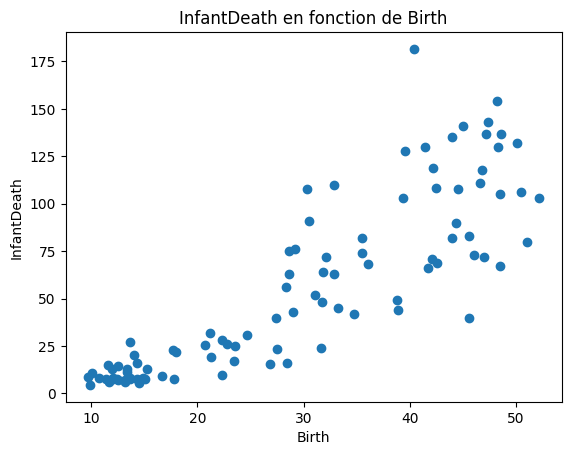

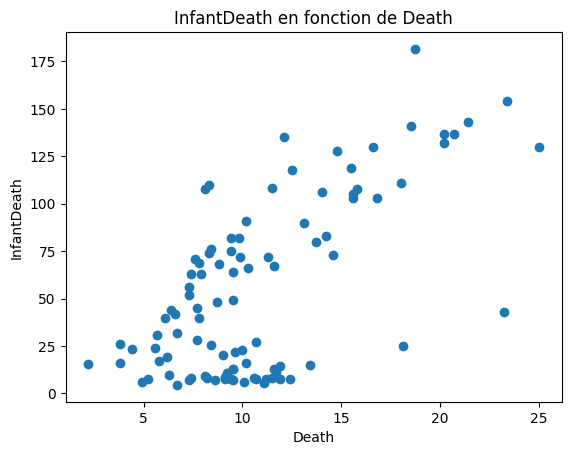

In [37]:
# Chargement des données depuis le fichier
df = pd.read_csv(folder+"poverty.txt", sep="\t", header=None, names=["Birth", "Death", "InfantDeath", "Country", "Continent"])

def plot_variable_relation(data, x_variable, y_variable):
    """
    Fonction pour tracer un graphe d'une variable en fonction d'une autre.
    
    Args:
        data (DataFrame): Les données à utiliser.
        x_variable (str): Le nom de la variable à utiliser sur l'axe des x.
        y_variable (str): Le nom de la variable à utiliser sur l'axe des y.
    """
    plt.scatter(data[x_variable], data[y_variable])
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title(f"{y_variable} en fonction de {x_variable}")
    plt.show()

# Graphe de InfantDeath en fonction de Birth
plot_variable_relation(df, "Birth", "InfantDeath")

# Graphe de InfantDeath en fonction de Death
plot_variable_relation(df, "Death", "InfantDeath")

# Question 2
Proposer une autre fonction qui contiendra toutes les étapes nécessaires pour tracer 
la distribution d’une variable (Birth, Death ou InfantDeath) sur les continents sous 
forme d’un camembert. Utiliser ce programme sur la base povrety

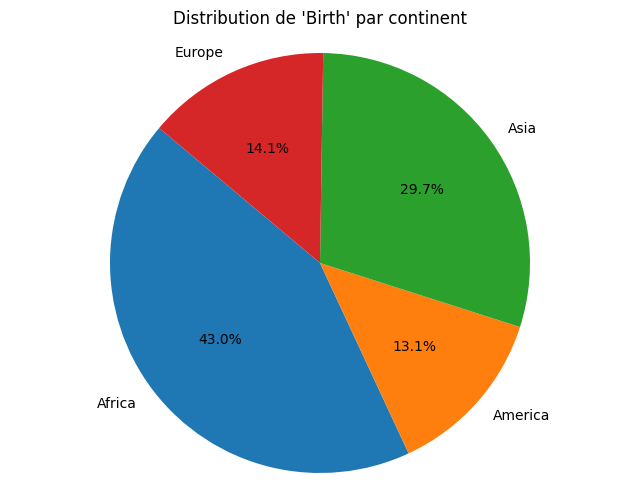

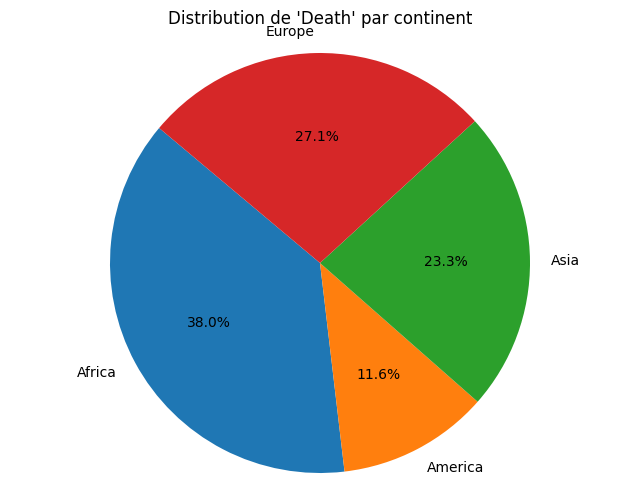

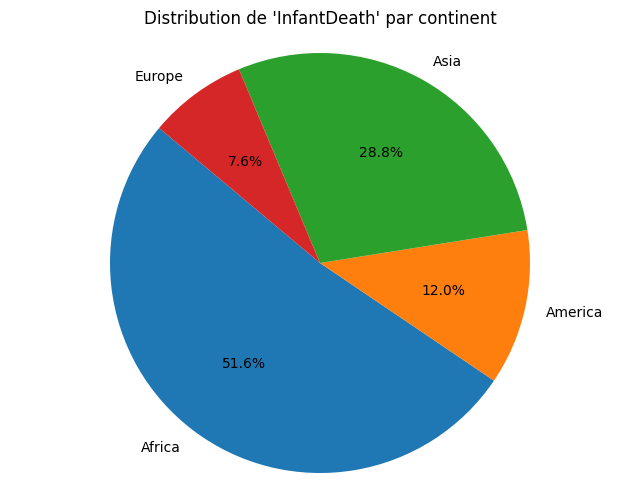

In [38]:
def plot_variable_distribution(data, variable):
    """
    Fonction pour tracer la distribution d'une variable sur les continents sous forme d'un camembert.
    
    Args:
        data (DataFrame): Les données à utiliser.
        variable (str): Le nom de la variable à tracer ('Birth', 'Death' ou 'InfantDeath').
    """
    # Regroupement des données par continent et calcul de la somme de la variable pour chaque continent
    grouped_data = data.groupby('Continent')[variable].sum()
    
    # Tracé du camembert
    plt.figure(figsize=(8, 6))
    plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Assure que le camembert est circulaire
    plt.title(f"Distribution de '{variable}' par continent")
    plt.show()

# Chargement des données depuis le fichier
data = pd.read_csv(folder+"poverty.txt", sep="\t", header=None, names=["Birth", "Death", "InfantDeath", "Country", "Continent"])

# Utilisation de la fonction pour tracer la distribution de 'Birth' par continent
plot_variable_distribution(data, "Birth")

# Utilisation de la fonction pour tracer la distribution de 'Death' par continent
plot_variable_distribution(data, "Death")

# Utilisation de la fonction pour tracer la distribution de 'InfantDeath' par continent
plot_variable_distribution(data, "InfantDeath")